#### Grace Wangui N -  Data Science Associate Role at Acled

# Question 1: Exploratory Data Analysis
This is the first part of the exercise. Goals as outlined are: 

Load and explore the data

## Step 1: Loading the data

Here I: 

- Import the pandas library and load the provided ACLED dataset into a DataFrame.  
- Display the first few rows to view the larger structure of the dataset.


In [1]:
# Import the required package for loading data
import pandas as pd

# Load the Acled conflict dataset
df = pd.read_csv('df_sample_ads.csv')

# Display the first few rows
df.head()


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,DRC30331,2023-08-01,2023,1,Demonstrations,Protests,Protest with intervention,Protesters (Democratic Republic of Congo),EPLC: Awakening of Patriots for the Liberation...,Protesters,...,Goma - Les Volcans,-1.6954,29.2360,1,Actualite; Mediacongo.net,National,"On 1 August 2023, the Police scattered with te...",0,crowd size=no report,1738629517
1,NIG32495,2023-08-01,2023,1,Political violence,Violence against civilians,Abduction/forced disappearance,Katsina Communal Militia (Nigeria),NaN,Identity militia,...,Dandume,11.4588,7.1261,2,Guardian (Nigeria),National,"On 1 August 2023, a Katsina militia abducted t...",0,NaN,1736845181
2,CAO7644,2023-08-02,2023,1,Political violence,Battles,Armed clash,Islamic State West Africa Province (ISWAP) and...,NaN,Rebel group,...,Ganse,11.1543,14.0715,2,Undisclosed Source,Local partner-Other,"On 2 August 2023, the military forces clashed ...",0,NaN,1730158783
3,BFO10375,2023-08-03,2023,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Burkina Faso (2022-),NaN,State forces,...,Guitoaliga,12.7290,0.0199,2,Facebook,New media,"On 3 August 2023, the Burkina Faso air force c...",3,NaN,1691427731
4,BFO10393,2023-08-04,2023,1,Strategic developments,Strategic developments,Looting/property destruction,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Sara,11.7205,-3.8370,1,Facebook; Whatsapp,New media,"Looting: On 4 August 2023, presumed JNIM milit...",0,NaN,1691427731


## Step 2: Explore detailed dataset structure and missing values
Here I:
- Display dataset information, including column names,their  data types, and non-null counts.
- Print the number of rows and columns.
- Count missing values in each column to check for incomplete data.


In [2]:
# View general info about the dataset
df.info()

# Display number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Show missing values per column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       1000 non-null   object 
 1   event_date          1000 non-null   object 
 2   year                1000 non-null   int64  
 3   time_precision      1000 non-null   int64  
 4   disorder_type       1000 non-null   object 
 5   event_type          1000 non-null   object 
 6   sub_event_type      1000 non-null   object 
 7   actor1              1000 non-null   object 
 8   assoc_actor_1       263 non-null    object 
 9   inter1              1000 non-null   object 
 10  actor2              831 non-null    object 
 11  assoc_actor_2       259 non-null    object 
 12  inter2              831 non-null    object 
 13  interaction         1000 non-null   object 
 14  civilian_targeting  354 non-null    object 
 15  iso                 1000 non-null   int64  
 16  region 

event_id_cnty           0
event_date              0
year                    0
time_precision          0
disorder_type           0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1         737
inter1                  0
actor2                169
assoc_actor_2         741
inter2                169
interaction             0
civilian_targeting    646
iso                     0
region                  0
country                 0
admin1                  1
admin2                  6
admin3                362
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
tags                  797
timestamp               0
dtype: int64

### Intepretation of step 2 above

The dataset contains 1000 rows and 31 columns.  
Columns include event details such as event date, event type, actors, location data, fatalities, and notes.

Several columns have missing values:  
- `assoc_actor_1` (737 missing)  
- `assoc_actor_2` (741 missing)  
- `actor2` (169 missing)  
- `inter2` (169 missing)  
- `civilian_targeting` (646 missing)  
- `admin3` (362 missing)
- `tags` (797 missing)

Most missing data occurs in optional descriptive fields, especially secondary actors and associations. 
In my understanding, as much as the civilian_targeting column looks like it has many missing data, the missing rows actually mean they are not targeted as opposed to being blank(more processing of this column will be done later)
The main event, actor1, and location columns are mostly complete.


## Step 3: Visualizing the distribution of categorical variables

Here I plot the distribution of key categorical columns: `disorder_type`, `event_type`, `sub_event_type`, `region`, `country`,  `interaction`, and `source_scale`.  
I use different colors for each plot to improve readability.

These visualizations are important because, they:  
- Show which disorder types, event types and sub event types are **most common**, this could help prioritize analysis of a certain event type in the subsequent tasks (e.g., political violence vs. protests).  
- Reveal geographic patterns by identifying regions and countries with the **highest number** of reported events.  
- Highlight the **most active** interaction types (e.g., rebel groups - civilians).
- Identify which source scales contribute most reports, helping assess **potential source bias** or coverage gaps. etc.
- All in all this visualizations help in reporting


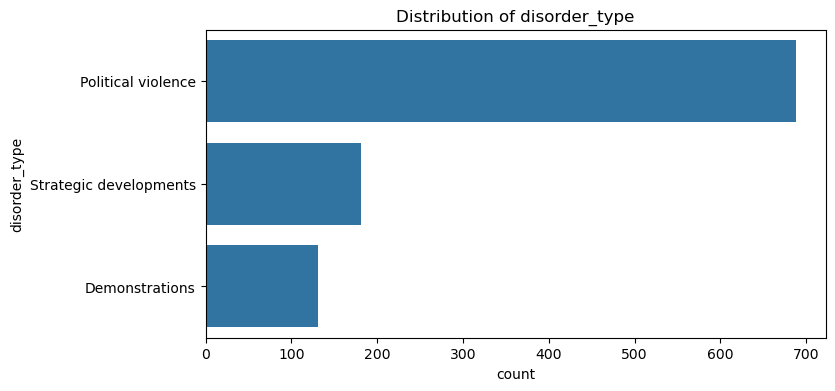

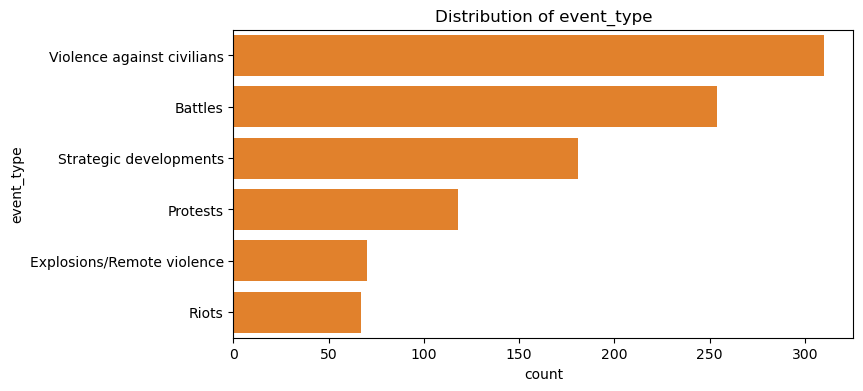

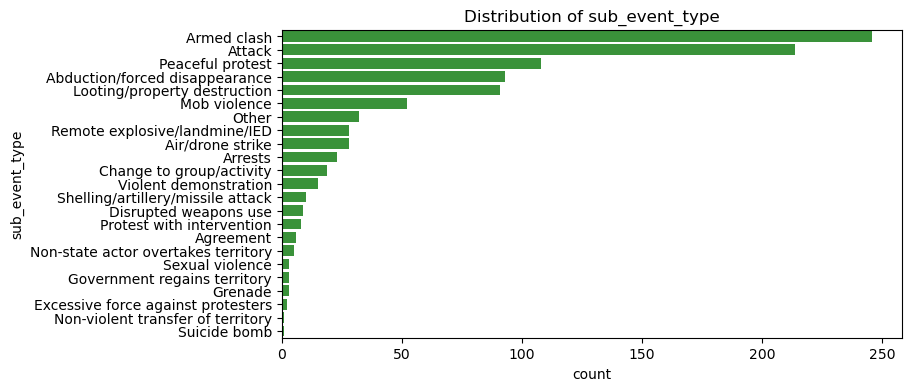

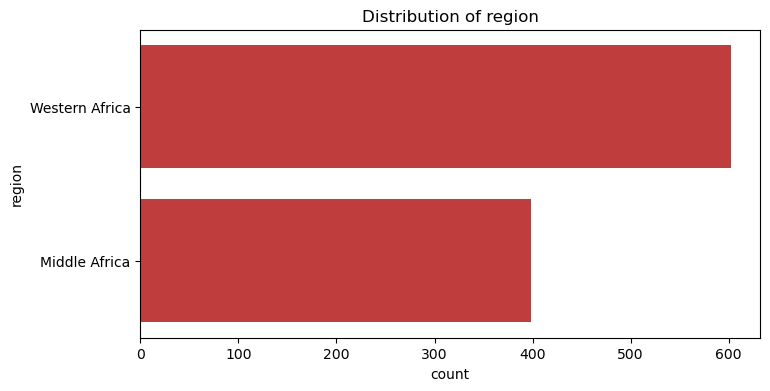

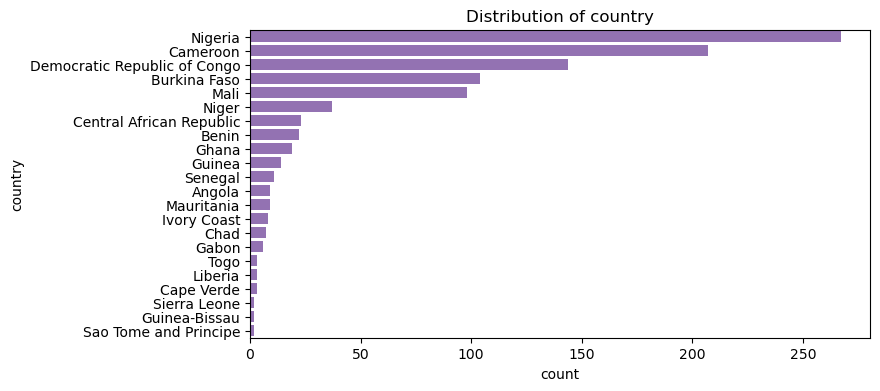

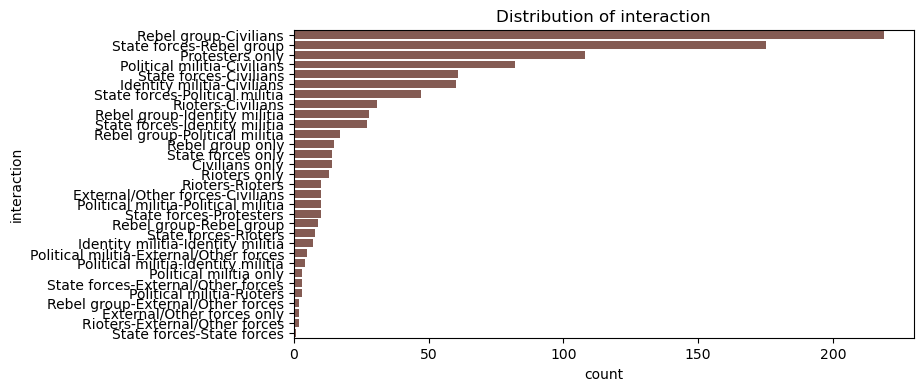

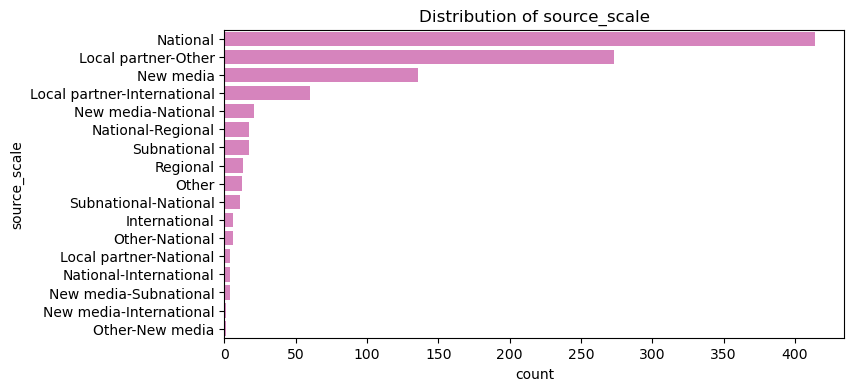

In [3]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns


# different colors or palettes for each plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# categorical columns to be plotted to visualize the distributions
categorical_cols = ['disorder_type', 'event_type', 'sub_event_type', 'region', 'country', 'interaction', 'source_scale']

# Keep only the first label in disorder_type (after first plot I realised some data points have both Political violence; Demonstrations disorder type)
df['disorder_type'] = df['disorder_type'].str.split(';').str[0].str.strip()

# Visualisation
for col, color in zip(categorical_cols, colors):
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, color=color)
    plt.title(f"Distribution of {col}")
    plt.show()



### Interpretation of Step 3 (Categorical Distributions)

1. **Disorder Type:** Political violence clearly dominates the dataset, indicating that most recorded events involve violent political conflict rather than demonstrations or strategic developments.
2. **Event Type:** Violence against civilians is the most common event type, followed by battles, highlighting a significant threat to civilian populations in the conflict zones.
3. **Sub-event Type:** Armed clashes and direct attacks lead the sub-event categories, suggesting that face-to-face combat and targeted violence are primary modes of conflict.
4. **Region:** Western Africa accounts for the majority of events, indicating a geographical concentration of political instability and conflict in that sub-region. Although, to be fair there might be location bias in this particular dataset as only two regions are included.
5. **Country:** Nigeria is the most represented country in the dataset, followed by Cameroon and the Democratic Republic of Congo, aligning with some of the known conflict hotspots.
6. **Interaction:** Rebel groups interacting with civilians and state forces interacting with protesters are the most frequent patterns, which potentially reflect both rebellion and state repression.
7. **Source Scale:** National-level sources contribute the bulk of event reporting, but local partners and new media also play a substantial role, pointing to a mix of centralized and decentralized information channels.


## Step 4: Visualizing the distribution of numerical variables

Here I plot the distribution of numeric columns:  
Importance?
- `fatalities` are important to observe the spread and frequency of reported deaths per event.  
- `geo_precision` and `time_precision` to understand how precisely or accurately the event locations and dates are coded.


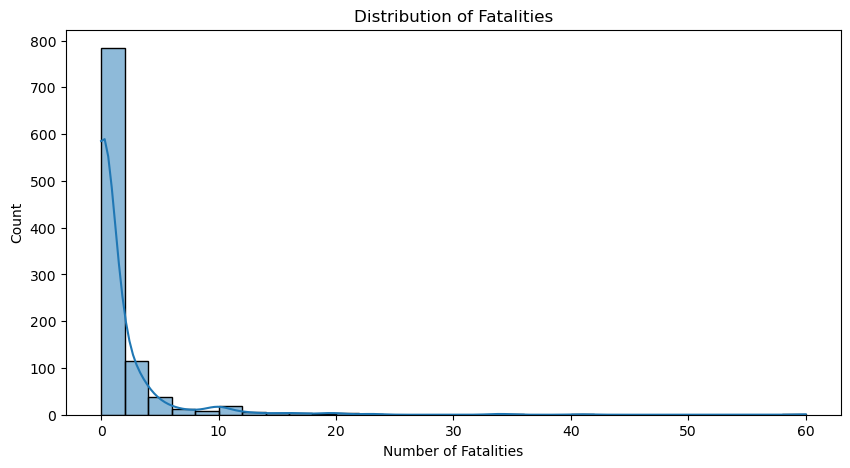

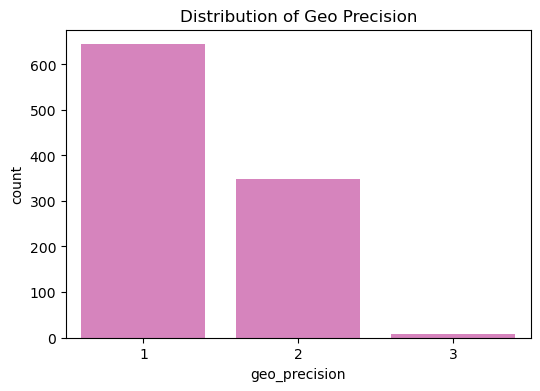

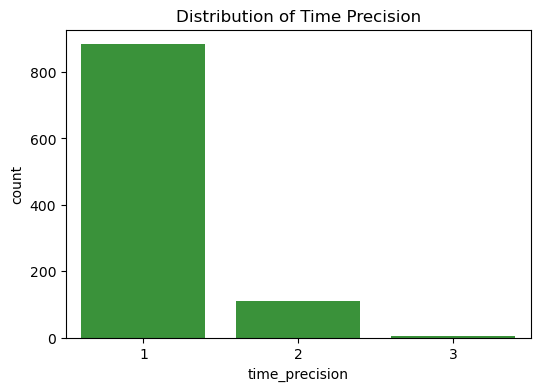

In [4]:


# Plot distribution for fatalities
plt.figure(figsize=(10,5))
sns.histplot(df['fatalities'], bins=30, kde=True, color='#1f77b4')
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.show()

# Plot distribution of geo_precision
plt.figure(figsize=(6,4))
sns.countplot(x='geo_precision', data=df, color='#e377c2')
plt.title('Distribution of Geo Precision')
plt.show()

# Plot distribution of time_precision
plt.figure(figsize=(6,4))
sns.countplot(x='time_precision', data=df, color='#2ca02c')
plt.title('Distribution of Time Precision')
plt.show()


###  Interpretation of step 4 numeric variables

- Most events reported **zero fatalities**, with a few outliers reporting up to 60 deaths. This indicates that the majority of events in the dataset are non-lethal or have low reported casualties.
- The majority of events have a **geo precision of 1**, meaning they are recorded with specific location information.
- Most events have a **time precision of 1**, meaning the exact event date is known. Only a small portion have time precision 2 or 3.


## Step 5:  Final Summary Visualizations

The following visualizations provide key insights into time patterns, geographic impacts, and the civilian targeting dynamics within the dataset:

- **Monthly Trend:** A line chart showing how the number of events fluctuates over time (monthly), helping identify peaks and potential seasonal patterns. This could help with humanitarian efforts staying better prepared for some seasons.
- **Fatality Heatmap:** A heatmap of average fatalities per event type and country, highlighting where and what types of violence are most lethal.
- **Civilian Targeting:** A bar chart comparing the number of events that did and did not explicitly target civilians, using distinct colors for clarity.

Purpose? These plots help visualize critical dimensions of the dataset and support further analysis and reporting.


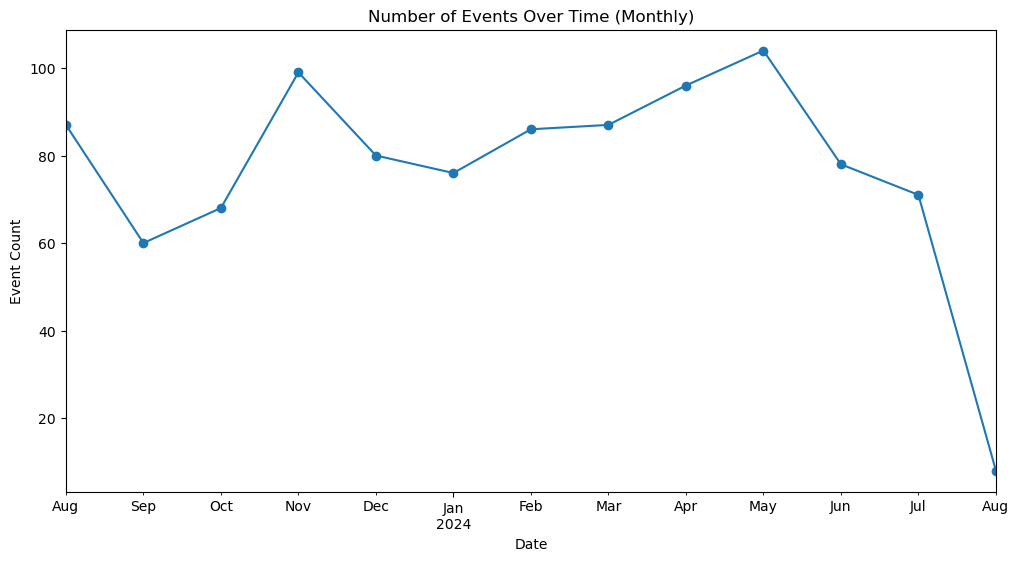

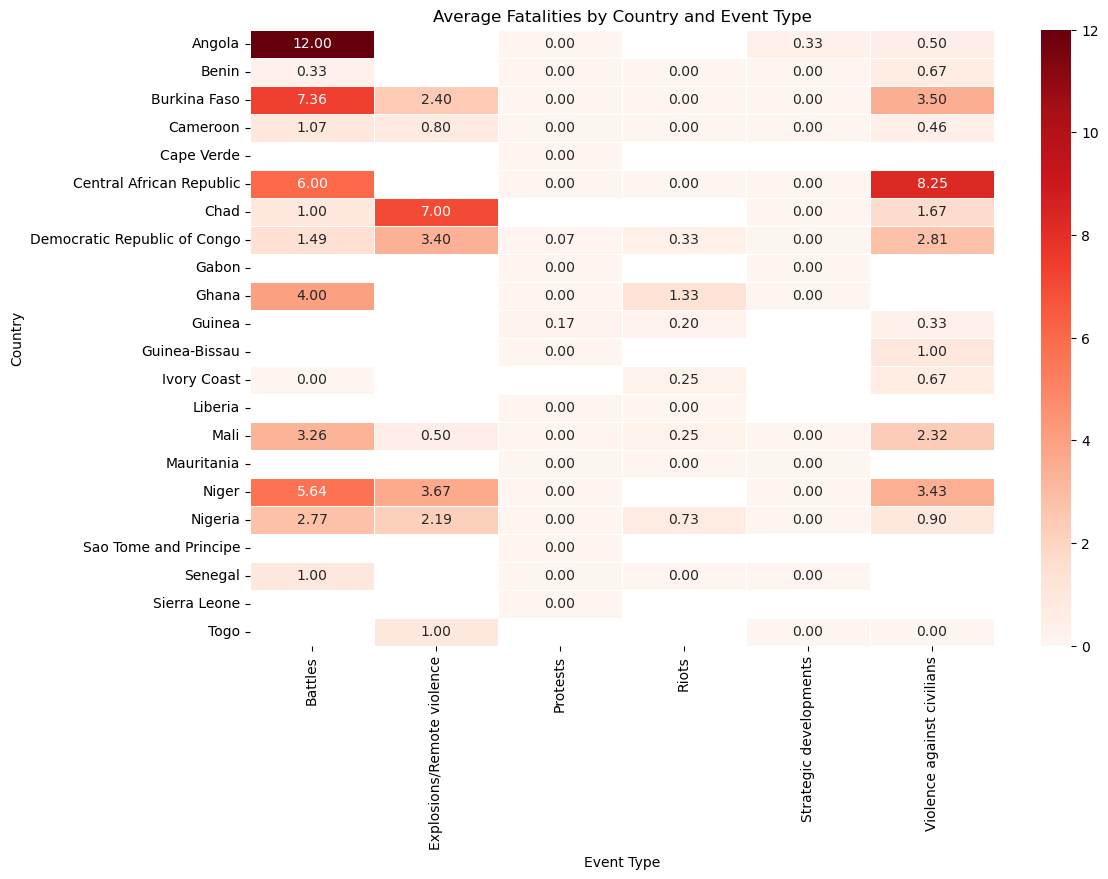

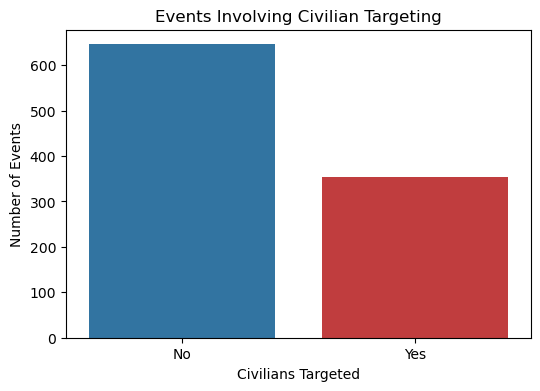

In [5]:

# Ensure event_date is datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Events over time, group by monthly
events_over_time = df.groupby(df['event_date'].dt.to_period('M')).size()
events_over_time.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Number of Events Over Time (Monthly)')
plt.ylabel('Event Count')
plt.xlabel('Date')
plt.show()

# Create a pivot table: rows = countries, columns = event types, values = average fatalities
heatmap_data = df.pivot_table(values='fatalities', index='country', columns='event_type', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Reds', linewidths=0.5)
plt.title('Average Fatalities by Country and Event Type')
plt.ylabel('Country')
plt.xlabel('Event Type')
plt.show()

#plot civilian targeting
# Map values for plotting
civilian_flag = df['civilian_targeting'].apply(lambda x: 'Yes' if x == 'Civilian targeting' else 'No')

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Civilians Targeted': civilian_flag})

# Plot using hue to control color 
plt.figure(figsize=(6, 4))
sns.countplot(data=plot_df, x='Civilians Targeted', hue='Civilians Targeted',
              palette={'Yes': '#d62728', 'No': '#1f77b4'}, legend=False)
plt.title('Events Involving Civilian Targeting')
plt.xlabel('Civilians Targeted')
plt.ylabel('Number of Events')
plt.show()



### Intepretation of step 5

- The number of recorded events varies month to month, and there are spikes in **November and May**, suggesting periodic surges in conflict or reporting.  
- The heatmap reveals that  **Angola, Burkina Faso, Central African Republic, and Chad** have some of the highest average fatalities per event, particularly from battles, explosions and violence against civilians.  
- Despite the fact that  most events are not involving civilian targeting, a significant portion (**over one-third**) still do, highlighting the risk faced by non-combatants in these conflict zones.


## EDA Summary

- **Dataset structure** → Inspected column types, data shape, and missing values.
- **Categorical variable distributions** → Visualized distributions for disorder type, event type, sub-event type, region, country, interaction, and source scale.
- **Numerical insights** → Plotted distribution of fatalities and assessed geo/time precision.
- **Temporal trends** → Analyzed monthly event frequency using a time series line plot.
- **Geographic impact** → Created a heatmap showing average fatalities by country and event type.
- **Targeting dynamics** → Visualized civilian targeting (yes vs no) with custom-colored bar chart.
- **Interpretations** → Provided markdown summaries for each chart to support insight extraction.


## Step 6 (EXTRA) - Altair Brush and Link Visualisation

### Brushing and Linking Visualisation

- Even though it wasn’t required, I thought it added depth  to the analysis and made the insights more accessible and dynamic. I included this visual to make it easier to explore how event types change over time.  
- By brushing over a specific time range in the scatter plot, I can instantly see which event types were most common during that period in the bar chart below.  
- This makes it easier to notice patterns, like spikes in battles or protests during particular months. This is helpful for stakeholders such as researchers who are interested in  interactive storytelling and want to explore specific date ranges without sifting through static reports.
  
- Also helps to interact with the data dynamically
- **How to use:**  
**Click and drag across the timeline to select a date range. The bar chart below will update to show the distribution of event types within that selected period.**
**Click on any blue circle on the scatter plot and tool tip appears to give the summary statistics.**

- Finally, **The stacked bar chart** visualizes weekly fatalities broken down by event type, providing a clear view of how different forms of conflict (e.g., battles, protests, violence against civilians) fluctuate over time.  



In [6]:
!pip install altair vega_datasets



In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import altair as alt

# Create a selection (brush)
brush = alt.selection_interval(encodings=['x'])

# Timeline: scatter plot of fatalities over time
timeline = alt.Chart(df).mark_circle(size=60).encode(
    x='event_date:T',
    y='fatalities:Q',
    color=alt.condition(brush, alt.value('steelblue'), alt.value('lightgray')),
    tooltip=['event_date', 'event_type', 'fatalities']
).add_selection(
    brush
).properties(
    width=600,
    height=200,
    title='Fatalities Over Time (Brush to Filter)'
)

# Bar chart: count of event types, filtered by brush
bar = alt.Chart(df).mark_bar().encode(
    y=alt.Y('event_type:N', sort='-x'),
    x='count():Q',
    color=alt.condition(brush, alt.value('orange'), alt.value('green'))
).transform_filter(
    brush
).properties(
    width=600,
    height=200,
    title='Event Type Count (Linked to Brush)'
)

# Combine vertically
timeline & bar



alt.VConcatChart(...)

In [9]:

# Group by week and event_type, summing fatalities
weekly = df.groupby([pd.Grouper(key='event_date', freq='W-MON'), 'event_type'])['fatalities'].sum().reset_index()
weekly.columns = ['week', 'event_type', 'fatalities']

# Stacked bar chart
chart = alt.Chart(weekly).mark_bar().encode(
    x=alt.X('week:T', title='Week'),
    y=alt.Y('fatalities:Q', title='Fatalities'),
    color=alt.Color('event_type:N', title='Event Type'),
    tooltip=['week:T', 'event_type:N', 'fatalities:Q']
).properties(
    width=700,
    height=400,
    title='Fatalities per Week by Event Type'
).interactive()

chart


alt.Chart(...)

# Question 2: NLP TASK
This is the second part of the exercise. Goals as outlined are: 

Use `notes` column to carry out an NLP related task
- Define the problem or question for the task
- Given the time constraints, what modelling approach is feasible for the task
- Asses the perfomance of chosen approach

## My Approach

## NLP Task Chosen: Classifying Civilian Targeting from Event Notes

## Problem Statement

In conflict zones, quickly identifying events that involve the deliberate targeting of civilians is crucial to inform, humanitarian response .  
However, structured labels like `civilian_targeting` are **mostly not always available in real time nor consistent**, especially in new or unverified reports.  

The **goal** of this task is to build a model that can automatically **classify** whether an event targets civilians based solely on the free-text `notes` column. And hence any new data that comes in say from a news source and is unclassified but is in the text form like the notes column, automatically updates the `civilian_targeting` column using the classifier model.
This can help flag high-risk incidents in real-time when structured labels are missing , down the line supporting faster decision-making and quick resource allocation.

### iN Summary;
I want to predict whether an event targets civilians based solely on the event description/ news source. I will train the model with the `notes` column.  
This helps assess whether unstructured text can be reliably used to detect human rights violations or civilian harm in conflict reports in real time.

## Why this task and why it is feasible for quick turnaround?
This task is grounded in the existing `civilian_targeting` column, which allows for **supervised classification**.  
It is feasible within the time constraints of this assignment because it is  binary and well-defined. 
More on justification:  I discuss after training in the subsequent cells

The goal is to determine if we can build a simple yet effective model to classify events as “Civilians targeted” or “Not targeted” based on the language / kind of words used in the notes/reporting.



In [10]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------- ------------------------ 5.0/12.8 MB 30.2 MB/s eta 0:00:01
     ------------------------------------- - 12.3/12.8 MB 32.2 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 29.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Step 1: Data Prep for NLP classification task

In [11]:
import spacy
from sklearn.model_selection import train_test_split

# Loading the SpaCy English model as the data is in English
nlp = spacy.load('en_core_web_sm')

# Create binary labels: 1 = civilians targeted, 0 = not targeted
df['targeted'] = df['civilian_targeting'].apply(lambda x: 1 if x == 'Civilian targeting' else 0)

# Count the number of targeted vs not targeted events (this is just to check if the dataset is balanced)
print(df['targeted'].value_counts())

# Drop rows with missing or empty notes (currently as seen in our analysis, `notes column` has no blanks but this functionality is here for future data that might have blank notes.
df = df[df['notes'].notna()]
df = df[df['notes'].str.strip() != ""]

# Using  SpaCy to perfom text cleaning by removing stop words and non alphabets, converting text to lowercase, and lemmatizations
def spacy_clean(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return ' '.join(tokens)

# Clean the notes column
df['clean_notes'] = df['notes'].apply(spacy_clean)



targeted
0    646
1    354
Name: count, dtype: int64


#### Explanation of step 1: Data prep for classification

Used SpaCy to clean and preprocess the `notes` column:

- Created binary labels from the `civilian_targeting` column 
- Converted text to lowercase
- Removed stop words, punctuation, and non-alphabetic tokens
- Lemmatized remaining words 




## Step 2:  Feature Prep and splitting training and testing data
- The new `clean_notes` column are the feautures i.e.  **x**
- The `targeted`column which  has binary labels  with 0 - Civilians Not targeted and 1 - Civilians targeted become our labels  i.e. **y**
- Split the data into training and test sets as we are undertaking a classification task

In [12]:

# Prepare features and labels
X = df['clean_notes']
y = df['targeted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Print sizes to double check my splits
print(f"Total samples: {len(df)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}\n")

# Print label distribution in each split
print("Label distribution in training set:")
print(y_train.value_counts(normalize=True))


print("\nLabel distribution in test set:")
print(y_test.value_counts(normalize=True))


Total samples: 1000
Training samples: 800
Test samples: 200

Label distribution in training set:
targeted
0    0.64625
1    0.35375
Name: proportion, dtype: float64

Label distribution in test set:
targeted
0    0.645
1    0.355
Name: proportion, dtype: float64


## Step 3: Turned the text to a vector using TF-IDF and Trained the Model

- I used TF-IDF vectorization to transform the cleaned text into numerical features i.e. a vector  
- I then trained a Logistic Regression classifier to predict whether an event involved civilian targeting, based on the  description in the `notes` column that was vectorized above.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Build pipeline using : TF-IDF vectorizer + Logistic Regression classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

# Train the model
model.fit(X_train, y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

### Modeling approach used and my justification for it 

Given the time constraints, I selected a **Logistic Regression classifier** combined with **TF-IDF vectorization** for the following reasons:

- It is **simple and fast** to implement, which makes it ideal for quick iterations.
- Logistic Regression performs well on **binary classification** tasks like this one for the problem statement and solution I defined.
- TF-IDF helps capture most frequent but also most important terms in the `notes`.
- The method handles the **moderate class imbalance** effectively, because i added  the `class_weight='balanced'` parameter.



## Step 4: Model Evaluation

- I evaluated the performance of this classifier.  
- The standardard classification report from sk_learn provides precision, recall, and F1-score for each class.  
- I plotted he confusion matrix which helps visualize true vs. predicted classifications.


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       129
           1       0.86      0.80      0.83        71

    accuracy                           0.89       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.89      0.88       200


Confusion Matrix:
[[120   9]
 [ 14  57]]


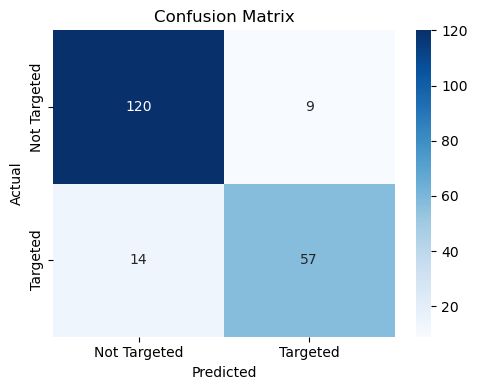

In [14]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

# Plot using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Targeted', 'Targeted'], yticklabels=['Not Targeted', 'Targeted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


## Step 4: Model Evaluation and Improvements

### Current Model Performance

The model achieved an overall **accuracy of 89%**, and showing good performance across both classes:

- **Class 0 (Not Targeted)**: Precision = 0.90, Recall = 0.93, F1-score = 0.91  
- **Class 1 (Targeted)**: Precision = 0.86, Recall = 0.80, F1-score = 0.83

The confusion matrix shows:
- 120 true negatives and 57 true positives (correct predictions)
- Only 9 false positives and 14 false negatives (misclassifications)

These results indicate that the model is both **precise and effective** at identifying civilian-targeting events, which are critical to detect.


### Abit of context on how and why the Performance Improved (from my first run. I had done a first run that didn't have the best scores)

Initially, the model had high precision but low recall for the `Targeted` class, meaning it missed many actual incidents.  
To address this, I enabled `class_weight='balanced'` in the Logistic Regression model. I figured the issue could have been the imbalanced nature of the data.

This helped the model give **more attention to the minority (targeted) class**, resulting in:
- Higher recall (from 0.56 → 0.80)
- Fewer false negatives (down from 31 → 14)
- and a stronger F1 score

By considering  **class imbalance**, I significantly improved the model’s ability to detect civilian-targeting event, which is the goal of my analysis


## Step 5:  Potential Future Improvements

With more time and access to higher-power resources (e.g., GPUs), I would improve the model using more advanced NLP techniques that better capture context and reduce critical misclassifications.  Especially the **false-negative misclassifications**, which in this context could have severe negative effects. e.g. Humanitarian organizations may not respond to areas that are civilian targeted but are misclassified. To reduce the false negatives to 0 I would: 

- **BERT Transformer-based models**: I would use a BERT transformer model, as it captures deeper semantic context than TF-IDF and is highly effective for text classification.

- **Custom domain-specific classifiers**: I would fine-tune pre-trained models on conflict-related or humanitarian text corpora to improve sensitivity and accuracy to detecting subtle language patterns associated with civilian targeting.

- **Focus on reducing false negatives**: In this context, false negatives—where the model misses actual incidents of civilian targeting—are far more dangerous than false positives. Missing these cases means victims might not receive help, and human rights violations could go unreported. Therefore, future improvements would prioritize **recall** for the "Targeted" class, even at the cost of a few false alarms.



## Saving the Model for Deployment

To make the trained model reusable in production or future analysis, I saved it using `joblib`.  
This will ensures the full pipeline can be easily reloaded and used for prediction without retraining.


In [15]:
import joblib

# Save the full model pipeline
joblib.dump(model, 'civilian_targeting_model.pkl')

#---------------Ignore (testing my saved model) ----------------------------

# Later: Load the model from file
# loaded_model = joblib.load('civilian_targeting_model.pkl')

#Testing ......
# sample_text = "Militants attacked civilians in a village in South Africa during a protest."
# cleaned_text = spacy_clean(sample_text)
# prediction = loaded_model.predict([cleaned_text])

# print("Prediction (1 = targeted, 0 = not targeted):", prediction[0])


['civilian_targeting_model.pkl']

# Question 3: System Design

This is the last part of the exercise:
Goals outlined as follows:

- Input data: Batch of news describing events within a country
- Input data type : Text in different languages
- Sources: Multiple
- Task: Identifying overlapping vs unique new stories

## Conceptual Design for Detecting Overlapping vs. Unique News Stories

To determine whether news articles from different sources describe overlapping or unique events, I would design a system with the following key components:

#### 1. Language Detection and translate
- **Detect language** of each article using tools like langdetect or SpaCy (`pip install spacy-language-detection`)
- **Translate** all articles into a common language i.e. English with the use of APIs such as Google Translate or HuggingFace MarianMT.

### 2. Text Preprocessing
- Clean text by removing generic words, dates, source names, and special characters..
- Perform lemmatization, lowercasing, and stopword removal.

### 3. Semantic Embedding
- Convert the pre-processsed text into **semantic embeddings** ( a vectorised text that takes into account the syntax, context and meaning) using a model such as Sentence-BERT (`all-MiniLM-L6`), to capture meaning across the articles.

### 4. Similarity Measurement
- Compute pairwise **cosine similarity** between the articles / text embeddings.
- Define a similarity threshold (e.g. 0.80). If it is above then two articles are considered overlapping.

### 5. Clustering
- Use a **clustering algorithms** (such as , DBSCAN which is density based) to group articles describing the same event.
- Flag clusters of size 1 as **unique stories**; larger clusters are **duplicate/overlapping reports**.

### 6. Use the knowledge of Human Analysts for Reinforcement Learning of the model
- I would build a simple dashboard showing clusters, the article data, and their summaries.
- Allow human analysts to validate matches and label the difficult cases. This will help improve the threshold I set and retrain the models. Do this iteratively and update models.

### 6. Other Enhancements
Because the process of building models is iterative. If the above process isn't highly accurate. I would add this features to keep improving it:

Rather than comparing full articles directly which can be computationally expensive I would extract they key parts of each event that is;
- Use **Named Entity Recognition (NER)** to identify and compare sources, places, and actors involved.
- Extract **metadata** like time of publication and source name.
- **So basically for each article I focus on who, what, where and when which reduces dimensionality when doing the similarity score**

This conceptual system would make it possible to automatically identify duplicate event reports and highlight new incidents for analysts or journalists monitoring fast-moving occurences or situations.

